# Module 9 - Programming Assignment

## Directions

There are general instructions on Blackboard and in the Syllabus for Programming Assignments. This Notebook also has instructions specific to this assignment. Read all the instructions carefully and make sure you understand them. Please ask questions on the discussion boards or email me at `EN605.445@gmail.com` if you do not understand something.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
You must follow the directions *exactly* or you will get a 0 on the assignment.
</div>

You must submit a zip file of your assignment and associated files (if there are any) to Blackboard. The zip file will be named after you JHED ID: `<jhed_id>.zip`. It will not include any other information. Inside this zip file should be the following directory structure:

```
<jhed_id>
    |
    +--module-09-programming.ipynb
    +--module-09-programming.html
    +--(any other files)
```

For example, do not name  your directory `programming_assignment_01` and do not name your directory `smith122_pr1` or any else. It must be only your JHED ID.  Make sure you submit both an .ipynb and .html version of your *completed* notebook. You can generate the HTML version using:

> ipython nbconvert [notebookname].ipynb

or use the File menu.

# Model Evaluation

In the last programming assignment, you implemented both linear and logistic regression. In this assignment, you're going to use the performance metrics and model evaluation techniques discussed in this module to evaluate the logistic regression.

You should use the logistic_regression.csv data from last time. You will also need to use your logistic regression implementation. The cleanest way is to export that notebook to a regular .py file and import your logistic_regression() function. You will need to submit that file along with your notebook. Otherwise, you'll have to copy-paste just the code you need into this workbook.

For this assignment, the discussion and programming are flipped. By answering the questions, you will be able to figure out what you need to do for this assigment.

## Discussion

**1\. We often want to know how well a model will perform on unseen data, that is, we want to get a sense of the generalization error. What is the name of the technique described in the lectures for accomplishing this. Sketch an algorithm for implementing this technique.**

<p>For regression, we can look at mean squared error to estimate how well the model will perform. For classification, we can look at performance metrics like accuracy, error, precision, and recall.</p>
<pre><code>def MSE(expected, x_values, regression):
    sum_error_squared = 0
    for x, e in x_values, expected:
        actual = regression(x)
        error = a - actual
        sum_error_squared += error * error
    mean_squared_error = sum_error_squared / len(x_values)
    return mean_squared_error

def classification_metrics(TP, FP, TN, FN):
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    error = (FP + FN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return accuracy, error, precision, recall</code></pre>

**2\. One of the first things people think of when trying to improve models is to get more data where "more data" is more observations (another view of "more data" is more features). What technique can we use to see if getting more observations will improve the performance of our model? Sketch an algorithm for accomplishing this.**

<p>We need to evaluate the bias-variance tradeoff and how the model performs on the training set vs the test set. More data only helps when the model is underfitting. We can examine the type of bias in our system by picking training set folds and test set folds of various sized slices of the original data. As we train the model on increasing proportion of data, we retain the error scores when we apply the model to both the test and train data sets. We can map out these scores in error lines, which shows us if the model has high or low bias. If the lines converge, it is high bias, and increased amount of data will not help improve the model.</p>
<pre><code>def slice(x_values, proportion):
    randomly select proportion of data as test data
    return train data, remainder data

def crossvalidation(data, num_blocks):
    randomly distribute data equally into num_locks
    return list of lists, where each list is a block of data

def error_graph(data): # assume fomat in Mod8 where data contains both x values and expected result
    train_error = []
    test_error = []
    p = []
    blocked_data = crossvalidation(data, 5)
    train_data = blocked_data[0] + blocked_data[1] + blocked_data[2] + blocked_data[3]
    test_data = blocked_data[5]
    for proportion in range(5, 100, 5): # determine step size here
        temp_train_data = slice(train_data, proportion)
        model = regression(temp_train_data, expected_values_for_train_data)
        train_error += [MSE(expected_values_for_train_data, temp_train_data, model)]
        test_error += [MSE(expected_values_for_test_data, test_data, model)]
        p += [proportion]
    plot (p, train_error)
    plot (p, test_error)
    # check if there is low or high bias visually by seeing if the error converge at 100%</code></pre>

**3\. Many algorithms have "hyper parameters" which control the performance of the algorithm independent of strictly data considerations. For example, a neural network can have 1 or 2 hidden layers and each layer can have N or M nodes. For logistic regression, a default threshold of 0.5 is often used for deciding if the classification should be 0 or 1 but that may not be the best value for our particular problem. What technique can we use to see check the values of our "hyper parameters"? Sketch an algorithm for accomplishing this.**

<p>We want to observe the effects of different thresholds on our test data, so that we can find the inflection point, or sweet spot between underfitting and overfitting. One way to do this is by testing different threshold points, let’s say it .1 increments, graphing the the resultant MSE of the test data.</p>
<pre><code>def find_inflection_point(data):

    # using functions defined in previous questions

    blocked_data = crossvalidation(data, 5)
    train_data = blocked_data[0] + blocked_data[1] + blocked_data[2] + blocked_data[3]
    test_data = blocked_data[5]

    test_mse = []
    threshold = []
    model = regression(train_data, expected_values_for_train_data)

    for t in range(0, 1.1, .1):
        threshold += [t]
        test_mse += [mse(expected_train_results, train_x_values, model)]

    # should be a roughly parabolic graph that we need to find the x value at minimum for
    generate parabolic function
    find x at min error</code></pre>

You are now going to evaluate your logistic regression model from last week on all three dimensions of evaluation and improvment. The questions you want to answer are:

1. how well would the logistic regression perform on new observations.
2. will getting more training data improve performance of our logistic regression.
3. What is the best threshold value for the logistic regression for this problem.

A couple of things to keep in mind:

1. Learning and Validation Curves are *curves*. Just printing data but not doing the **charts** will result in a failing assignment.
2. Plot lines and not points. Yes, you don't have a point for every value but just plot lines anyway.

When in doubt, ask questions the discussion forums. I'm leaving this one a bit open-ended to test your understanding of the module and how learning curves are used to assess models. 

Use matplotlib for your charts; a student posted a link to a nice tutorial http://matplotlib.org/1.3.1/users/pyplot_tutorial.html.

Make sure you describe your rationale and design choices.

**Answer 1.**

In [2]:
from cchen218 import read_data, learn_logistic_regression, apply_logistic_regression

def MSE(data, model):
    '''
    Calculates the mean squared error of the model given representative data
    :param data: data set, with each row representing a tuple of associated x and y values
    :param model: model
    :return: mean squared erorr
    '''
    sum_error_squared = 0

    for point in data:
        actual = apply_logistic_regression(model, point[:-1])
        expected = point[-1]
        error = expected - actual
        sum_error_squared += error * error

    mean_squared_error = sum_error_squared / len(data)
    return mean_squared_error

data = read_data("logistic_regression.csv")
model = learn_logistic_regression(data)
error = MSE(data, model)
print("Error using MSE: " + str(error))

Error using MSE: 0.1252342919770589


**Answer 2.**

Plotting for convergence...


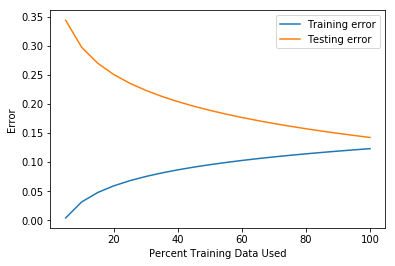

Getting more training data will help with the model. From the above graph, we see that the error rate is not converging at 100%, which implies that there is low bias and high variance.
Steps of size 5% were used to monitor convergence.


In [11]:
from cchen218 import read_data, learn_logistic_regression, MSE
import random
import numpy as np
from math import exp, log, floor
import matplotlib.pyplot as plt

def bias(data):
    '''
    Part 2 of the problem. plots the bias-variance of the model to test for convergence
    :param data: input data
    :return:
    '''
    train_error = []
    test_error = []
    p = []

    data_blocks = cross_validation(data, 5)
    train_data = data_blocks[0] + data_blocks[1] + data_blocks[2] + data_blocks[3]
    test_data = data_blocks[4]

    for proportion in range(5, 105, 5):  # determine step size here
        temp_train_data = train_data[:floor(proportion / 100 * len(train_data))]
        model = learn_logistic_regression(temp_train_data)

        train_error += [MSE(temp_train_data, model)] # should this be train_data or temp_train_data
        test_error += [MSE(test_data, model)]
        p += [proportion]
    print("Plotting for convergence...")
    plot(p, train_error, test_error, 1, True, "Percent Training Data Used", "Error")
    return

def cross_validation(data, num_blocks):
    '''
    Returns a list of list of randomized data, split into equal block sizes
    :param data:
    :param num_blocks:
    :return:
    '''
    random.shuffle(data)
    blocks = []

    start_idx = 0
    block_length = len(data) // num_blocks

    for i in range(num_blocks):
        blocks.append(data[start_idx: start_idx + block_length])
        start_idx += block_length

    # capture remainder of data
    blocks[-1].extend(data[start_idx:])
    return blocks

def plot(x, train_y, test_y, degree=1, log_fit=False, xaxis='x axis', yaxis='y axis'):
    '''
    Creates a best fit line for the input data and graphs it
    :param x: values for x axis (could be parameters)
    :param train_y: y values from training data
    :param test_y: y values from testing data
    :param degree: polynomial degree
    :param log_fit: True if we want to use a log fit
    :param xaxis: label for x axis
    :param yaxis: label for y axis
    :return: trendlines for training and test data
    '''

    if log_fit:
        trend1 = np.polyfit(np.log(np.array(x)), train_y, degree)
        trend2 = np.polyfit(np.log(np.array(x)), test_y, degree)

        trendpoly1 = np.poly1d(trend1)
        trendpoly2 = np.poly1d(trend2)

        plt.plot(x, trendpoly1(np.log(np.array(x))), label="Training error")
        plt.plot(x, trendpoly2(np.log(np.array(x))), label="Testing error")
    else:
        trend1 = np.polyfit(x, train_y, degree)
        trend2 = np.polyfit(x, test_y, degree)

        trendpoly1 = np.poly1d(trend1)
        trendpoly2 = np.poly1d(trend2)

        plt.plot(x, trendpoly1(x), label="Training error")
        plt.plot(x, trendpoly2(x), label="Testing error")

    plt.legend()

    plt.ylabel(yaxis)
    plt.xlabel(xaxis)

    plt.show()

    return trend1, trend2

data = read_data("logistic_regression.csv")
bias(data)
print("Getting more training data will help with the model. From the above graph, we see that the error rate is not converging at 100%, which implies that there is low bias and high variance.")
print("Steps of size 5% were used to monitor convergence.")

**Answer 3.**

Plotting to find the best threshold value...


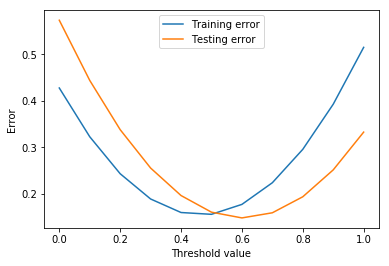

The best threshold value is: 0.6028358208955228
This threshold value was found using the method described in Part 2 of the Module 09, where we test the effects of the changing the paremeter on the test data


In [9]:
from cchen218 import read_data, learn_logistic_regression, MSE, plot, cross_validation, apply_logistic_regression
import random
import numpy as np
from math import exp, log, floor
import matplotlib.pyplot as plt

def find_inflection_point(data):
    '''
    Finds the inflection point/threshold for the given data for part 3
    :param data: input data
    :return: None
    '''
    # using functions defined in previous questions

    data_blocks = cross_validation(data, 5)
    train_data = data_blocks[0] + data_blocks[1] + data_blocks[2] + data_blocks[3]
    test_data = data_blocks[4]

    test_error = []
    train_error = []
    threshold = []
    threshold_range = [x * 0.1 for x in range(0, 11)]

    model = learn_logistic_regression(train_data)

    for t in threshold_range:
        temp_train_error = 0
        temp_test_error = 0
        for point in train_data:
            expected = point[-1]
            actual = 1 if apply_logistic_regression(model, point[:-1]) >= t else 0
            temp_train_error += int(not expected == actual) ** 2
        for point in test_data:
            expected = point[-1]
            actual = 1 if apply_logistic_regression(model, point[:-1]) >= t else 0
            temp_test_error += int(not expected == actual) ** 2

        train_error += [temp_train_error / len(train_data)]
        test_error += [temp_test_error / len(test_data)]
        threshold += [t]

    # graph and find x value at minimum
    print("Plotting to find the best threshold value...")
    test_eq, trend_eq = plot(threshold, train_error, test_error, 2, False, "Threshold value", "Error")
    inflection = -trend_eq[1] / 2 / trend_eq[0]
    print("The best threshold value is: " + str(inflection))
    return

data = read_data("logistic_regression.csv")
find_inflection_point(data)
print("This threshold value was found using the method described in Part 2 of the Module 09, where we test the effects of the changing the paremeter on the test data")